In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans


from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\thanaphat turienngam\Desktop\data_warehouse\Mall Customer Segmentation - KMeans Clustering\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    200
dtype: int64

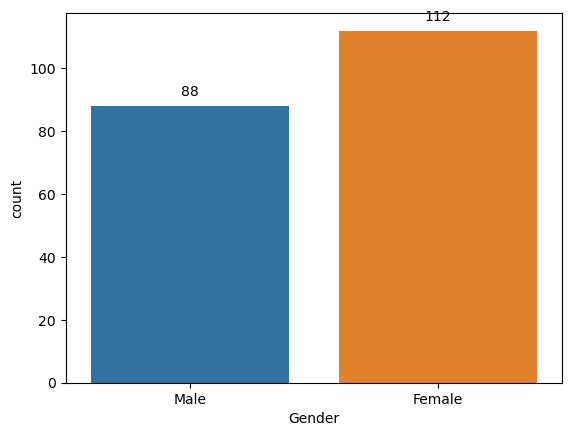

In [10]:
ax = sns.countplot(x='Gender', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

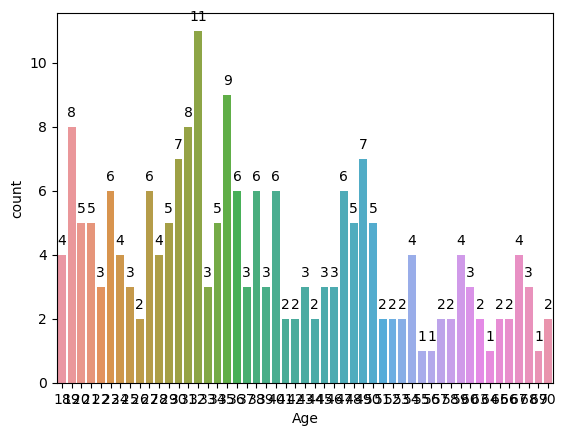

In [11]:
ax = sns.countplot(x='Age', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

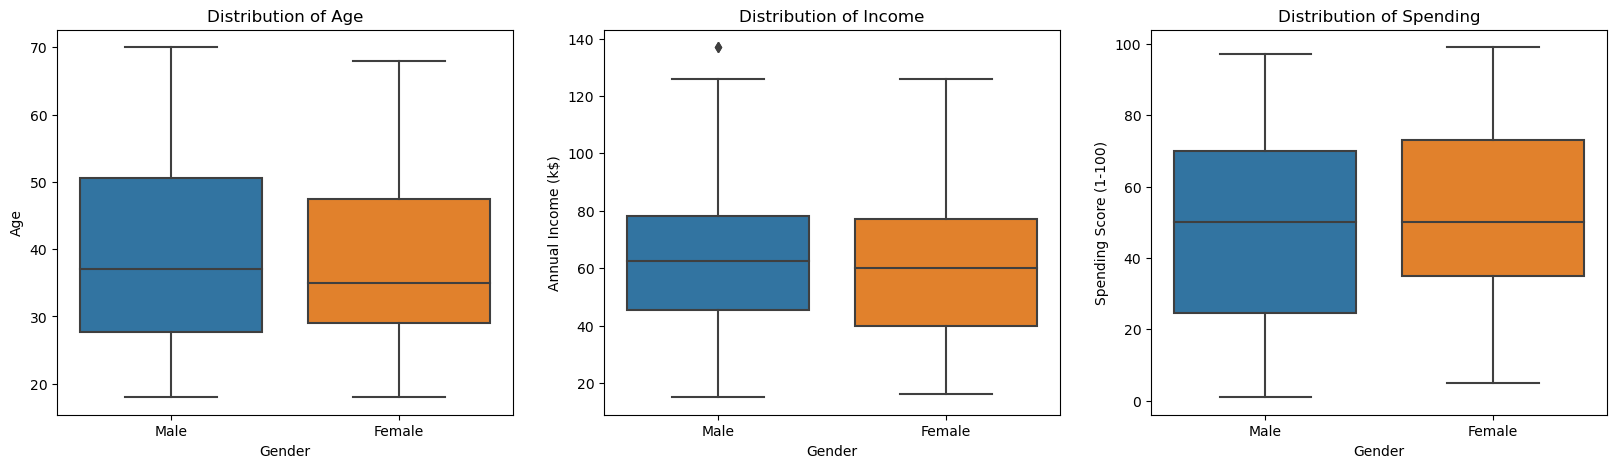

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age)
plt.title('Distribution of Age')

plt.subplot(1,3,2)
sns.boxplot(x=df.Gender, y=df['Annual Income (k$)'])
plt.title('Distribution of Income')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df['Spending Score (1-100)'])
plt.title('Distribution of Spending')
plt.show()

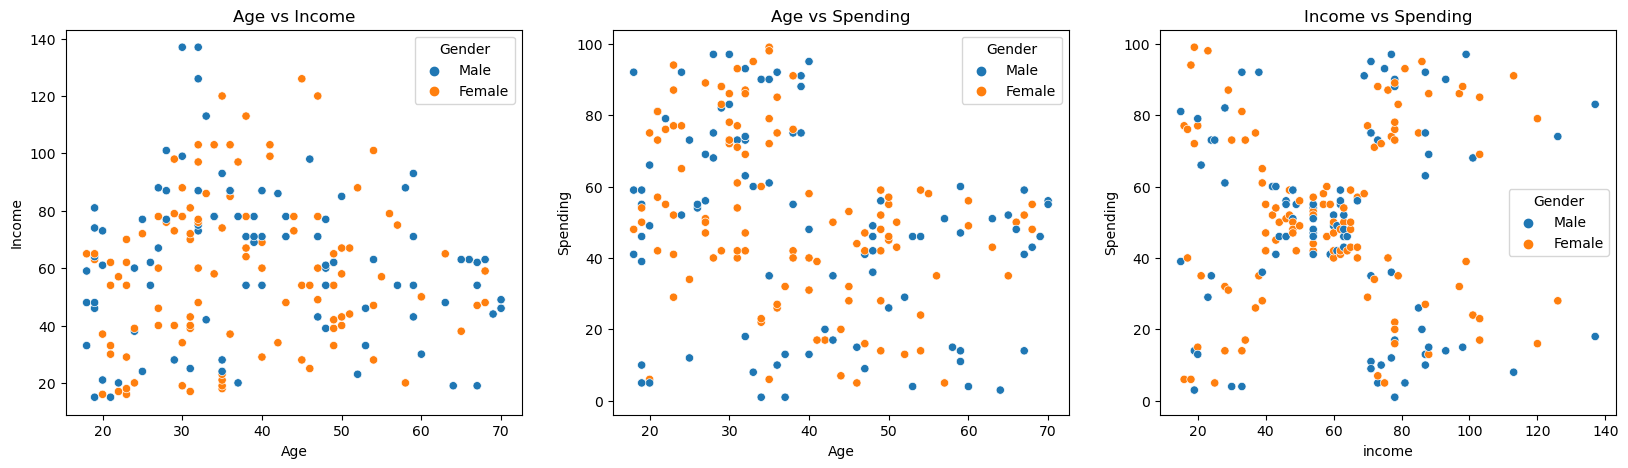

In [13]:
female = df[df.Gender == 'Female']
male = df[df.Gender == 'Male']

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data = df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

plt.subplot(1,3,2)
sns.scatterplot(data = df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Age vs Spending')


plt.subplot(1,3,3)
sns.scatterplot(data = df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.xlabel('income')
plt.ylabel('Spending')
plt.title('Income vs Spending')
plt.show()



In [14]:
x=df

In [15]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
wcss = []

for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562,
 19634.554629349972]

In [18]:
import numpy.matlib

In [19]:
nPoints = len(wcss)
allCoord = np.vstack((range(nPoints), wcss)).T
firstPoint = allCoord[0]
lineVec = allCoord[-1] - allCoord[0]
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
vecFromFirst = allCoord - firstPoint
scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
idxOfBestPoint = np.argmax(distToLine)

In [20]:
print(f'Optimum number of cluster by Elbow method: {idxOfBestPoint+2}')

Optimum number of cluster by Elbow method: 5


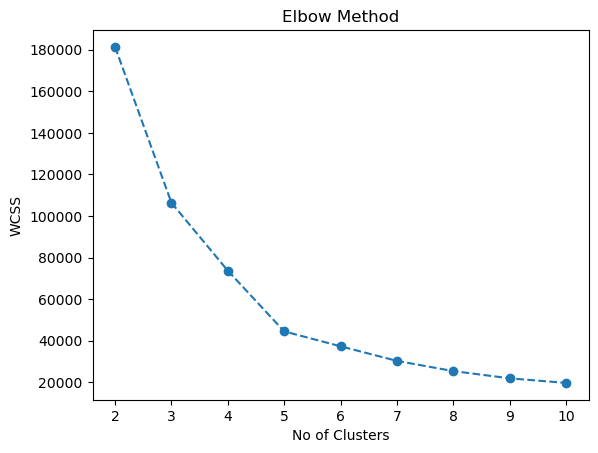

In [21]:
plt.plot(range(2,11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(x)
y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [23]:
df['Cluster'] = kmeans.labels_
df.head()
# df.to_csv('ans.csv')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [24]:
# plot_km = df[['Annual Income (k$)','Spending Score (1-100)']]
# plot_km['Cluster']=df['Cluster']
# plot_km

0
1
2
3
4


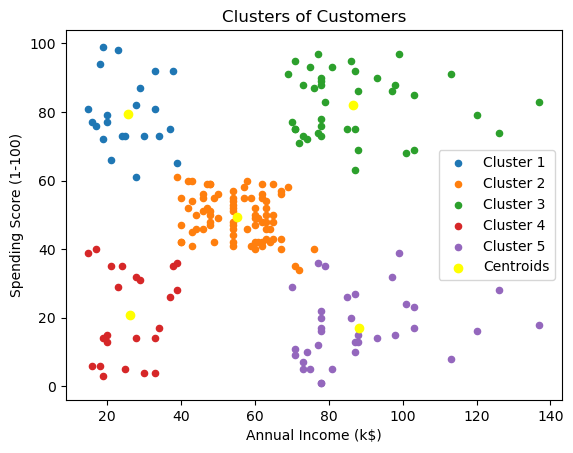

In [25]:
for i in range(idxOfBestPoint+2):
    print(i)
    plt.scatter(x[y == i, 0], x[y == i, 1], s = 20, label = f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('Cluster_Of_Customers1.png')
plt.show()

In [26]:
# import plotly.express as px
# import matplotlib.pyplot as plt

# plot_km=plot_km.sort_values(by='Cluster')
# plot_km['Cluster'] = plot_km['Cluster'].astype(str)

# # Plot of clusters
# plot = px.scatter(plot_km, x="Spending Score (1-100)", y="Annual Income (k$)", color="Cluster", 
#                  color_discrete_sequence=px.colors.qualitative.Prism)

# plot.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))

# plot.update_layout(template='plotly_white', title="K-Means Cluster Profiles,<br>Customer Spending vs. Income", 
#                   width=700, legend_title='Cluster',
#                   xaxis=dict(title='Spending Score', showline=True, zeroline=False), 
#                   yaxis=dict(title='Income, $', ticksuffix='k', showline=True))
# plot.write_image('scatter.png')
# plot.show()

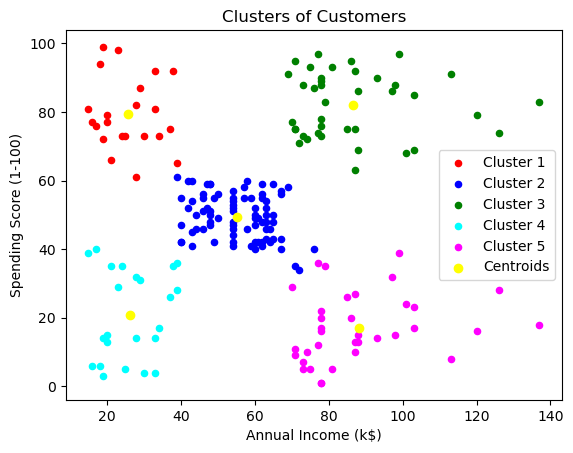

In [27]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('Cluster_Of_Customers.png')
plt.show()



In [28]:
# Cluster 1: Low Income, High Spending Score
# Cluster 2: Average Income, Average Spending Score
# Cluster 3: High Income, High Spending Score
# Cluster 4: Low Income, Low Spending Score
# Cluster 5: High Income, Low Spending Score




In [29]:
oneData = df.iloc[y == 0, :]
twoData = df.iloc[y == 1, :]
threeData = df.iloc[y == 2, :]
fourData = df.iloc[y == 3, :]
fiveData = df.iloc[y == 4, :]

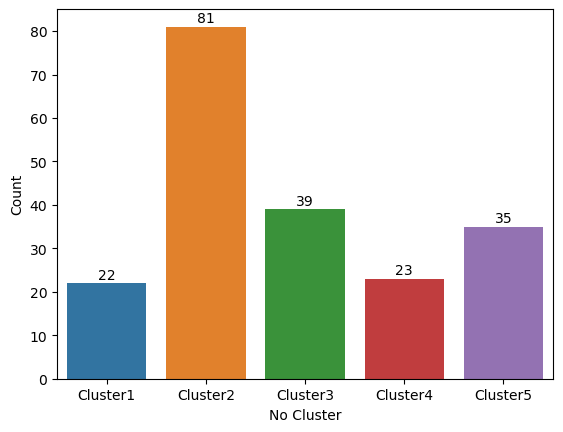

In [30]:
lenCluster = []
cluster = []
for i in range(idxOfBestPoint+2):
    cluster.append(f'Cluster{i+1}')
    lenCluster.append(len( df.iloc[y == i, :]))
    
ax = sns.barplot(x=cluster,
                 y=lenCluster)
for i, v in enumerate(lenCluster):
    ax.text(i, v + 1, str(v), horizontalalignment='center')
plt.xlabel('No Cluster')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Cluster One')

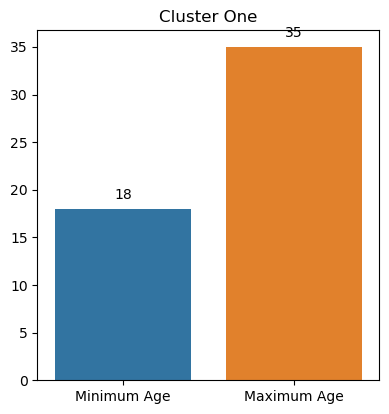

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [oneData['Age'].min(), oneData['Age'].max()])
for i, v in enumerate([oneData['Age'].min(), oneData['Age'].max()]):
    ax.text(i, v + 1, str(v), horizontalalignment='center')
plt.title('Cluster One')

In [32]:
(df.iloc[y == 0, :])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
11,12,Female,35,19,99,0
13,14,Female,24,20,77,0
15,16,Male,22,20,79,0
17,18,Male,20,21,66,0
19,20,Female,35,23,98,0


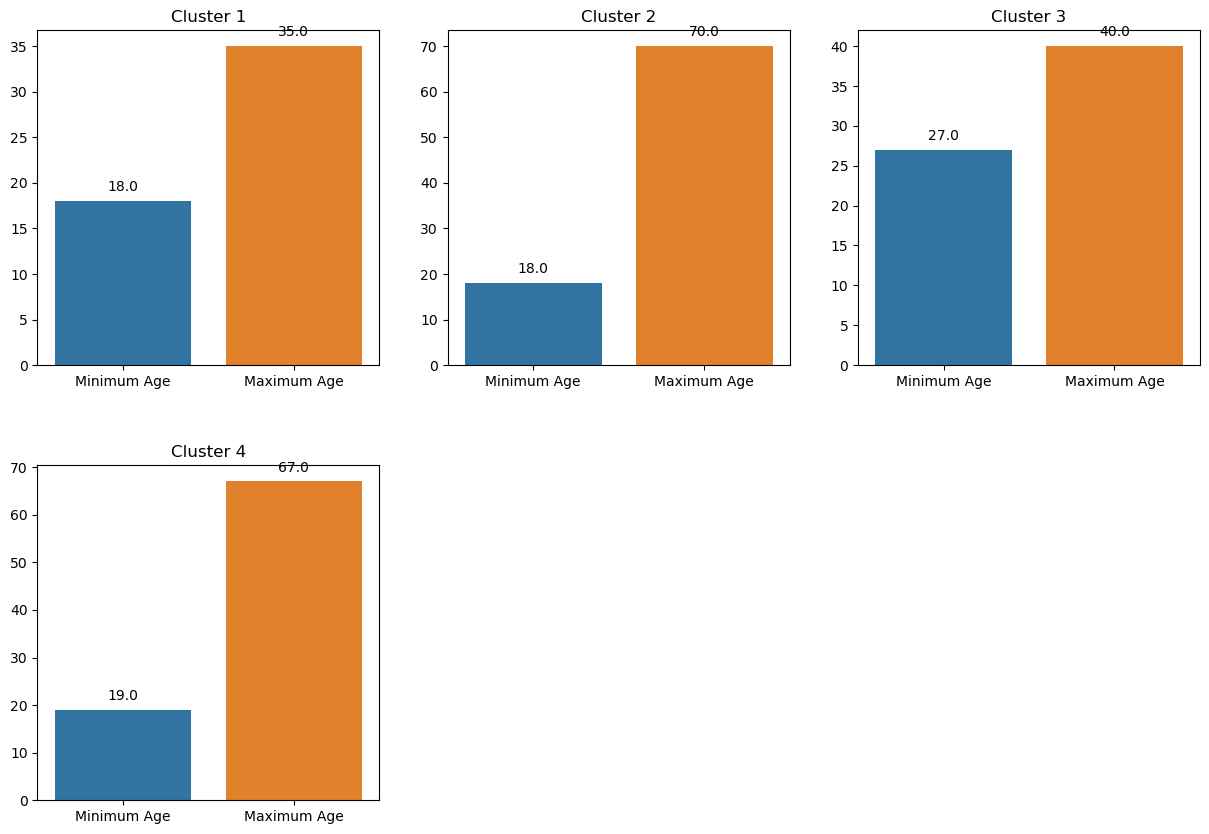

In [33]:
plt.figure(figsize=(15,10))
ClusterNo = idxOfBestPoint+2
for i in range(1,idxOfBestPoint+2):
    plt.subplot(2,3,i)
    ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [(df.iloc[y == i-1, :])['Age'].min(),(df.iloc[y == i-1, :])['Age'].max()])
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.title(f'Cluster {i}')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()


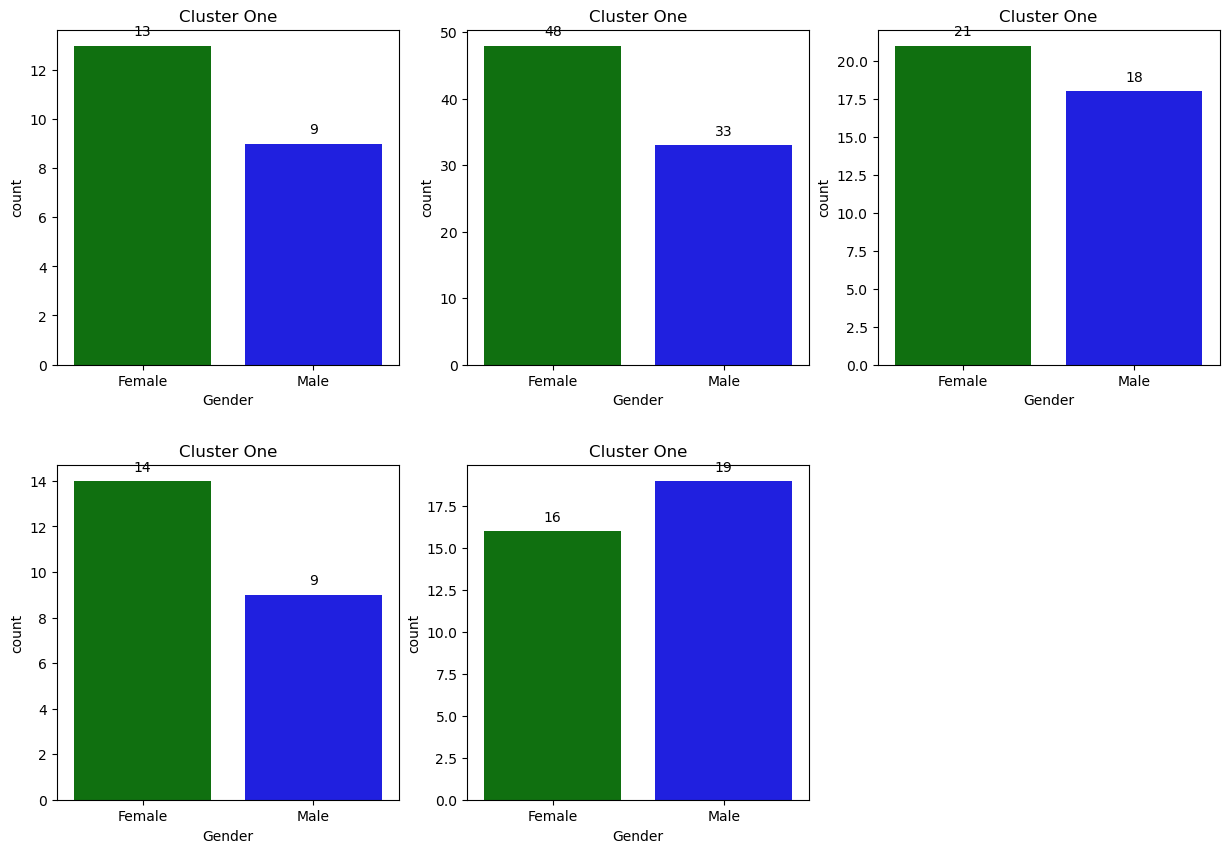

In [34]:
plt.figure(figsize=(15,10))
ClusterNo = idxOfBestPoint+2
for i in range(0,5):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x ='Gender', data = (df.iloc[y == i, :]),palette={'Male': 'blue', 'Female': 'green'}, order=['Female', 'Male'])
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.title('Cluster One')
    
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()    

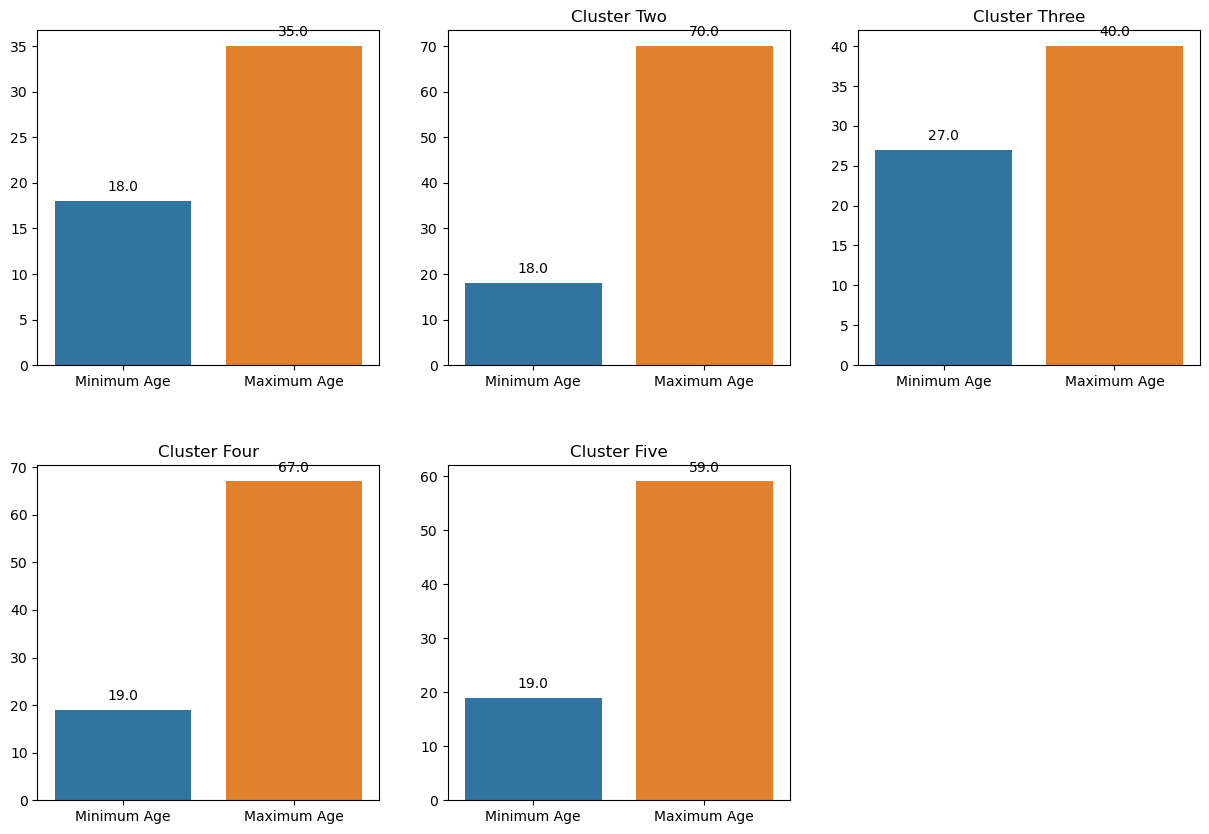

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [oneData['Age'].min(), oneData['Age'].max()])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(2,3,2)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [twoData['Age'].min(), twoData['Age'].max()])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [threeData['Age'].min(), threeData['Age'].max()])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fourData['Age'].min(), fourData['Age'].max()])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fiveData['Age'].min(), fiveData['Age'].max()])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()


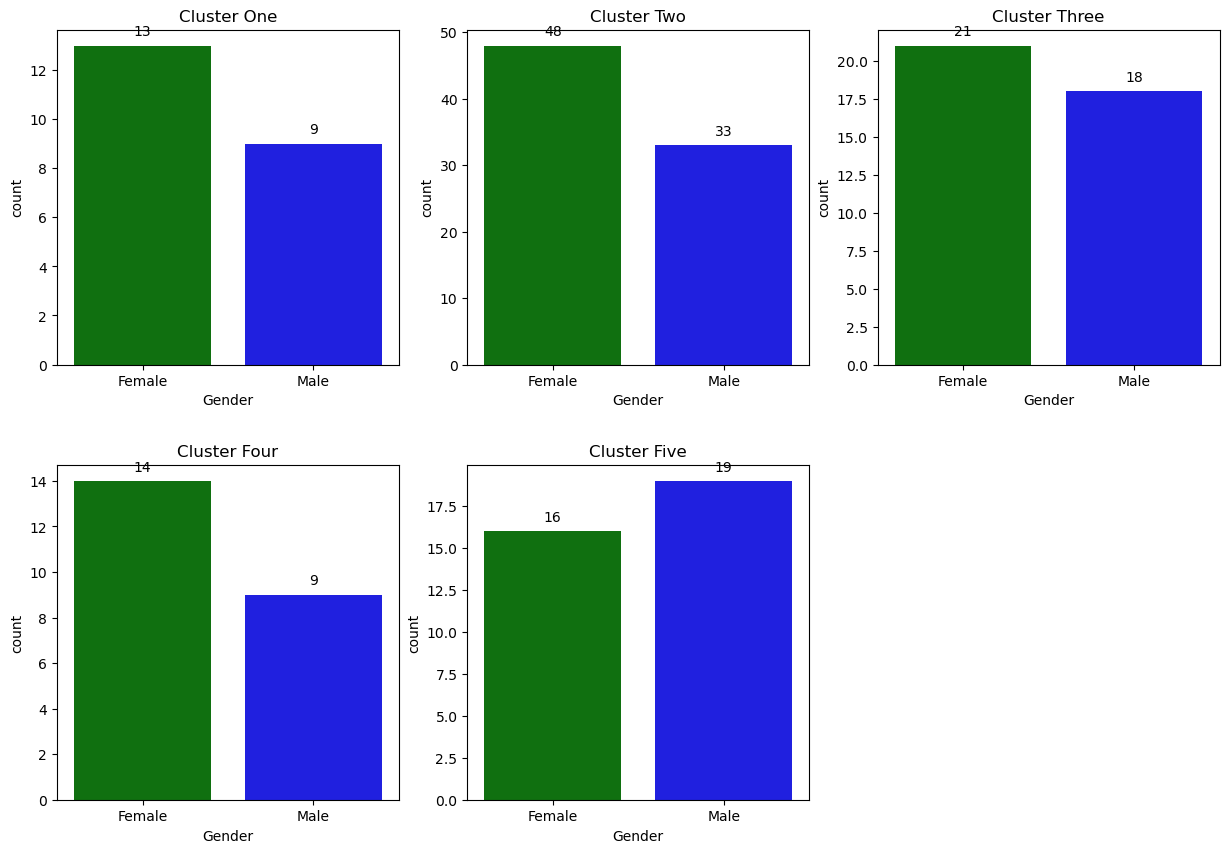

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.countplot(x ='Gender', data = oneData,palette={'Male': 'blue', 'Female': 'green'}, order=['Female', 'Male'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.countplot(x = 'Gender', data = twoData,palette={'Male': 'blue', 'Female': 'green'}, order=['Female', 'Male'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.countplot(x = 'Gender', data = threeData,palette={'Male': 'blue', 'Female': 'green'}, order=['Female', 'Male'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points' )
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.countplot(x = 'Gender', data = fourData,palette={'Male': 'blue', 'Female': 'green'}, order=['Female', 'Male'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.countplot(x = 'Gender', data = fiveData,palette={'Male': 'blue', 'Female': 'green'}, order=['Female', 'Male'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

In [37]:
import pickle

In [38]:
# It is important to use binary access
pickle.dumps(kmeans)
pickle.dump(kmeans, open("Clustering_Model.sav", 'wb'))

In [39]:
occ_model = pickle.load(open("model/OCC_SVM_VER_01.sav", 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'model/OCC_SVM_VER_01.sav'